In [1]:
# Import Data Science Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from keras_preprocessing.image import ImageDataGenerator

from data_generation import prepare_data

BATCH_SIZE = 64
TARGET_SIZE = (224, 224)

In [2]:
train_df, val_df, test_df = prepare_data()

Train Shape:  (67708, 2)
Validation Shape:  (16927, 2)
Test Shape:  (5250, 2)


In [3]:
train_generator = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=30,
                        brightness_range=[0.7,1.3],
                        zoom_range=0.3,
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        horizontal_flip=True)

test_generator = ImageDataGenerator(rescale=1./255)

# Generate Training images
train_images = train_generator.flow_from_dataframe(
                        dataframe=train_df,
                        x_col='Filepath',
                        y_col='Label',
                        target_size=TARGET_SIZE,  # all images will be resized to TARGET_SIZE
                        interpolation='nearest',
                        color_mode='rgb',
                        class_mode='categorical',
                        classes=list(train_df['Label'].unique()),
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        seed=175)

# Generate Validation images
val_images = test_generator.flow_from_dataframe(
                    dataframe=val_df,
                    x_col='Filepath',
                    y_col='Label',
                    target_size=TARGET_SIZE,  # all images will be resized to TARGET_SIZE
                    interpolation='nearest',
                    color_mode='rgb',
                    class_mode='categorical',
                    classes=list(train_df['Label'].unique()),
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    seed=42)

# Generate test images
test_images = test_generator.flow_from_dataframe(
                    dataframe=test_df,
                    x_col='Filepath',
                    y_col='Label',
                    target_size=TARGET_SIZE,  # all images will be resized to TARGET_SIZE
                    interpolation='nearest',
                    color_mode='rgb',
                    class_mode='categorical',
                    classes=list(train_df['Label'].unique()),
                    shuffle=False,
                    seed=42)

Found 67708 validated image filenames belonging to 525 classes.
Found 16927 validated image filenames belonging to 525 classes.
Found 5245 validated image filenames belonging to 525 classes.


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)))
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2, padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, padding="same"))
model.add(layers.BatchNormalization())

model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(525, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

/Users/akhil/Documents/NEU DAE/Spring24/NeuralNets/Project/bird_image_classifier/nndl_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-14 14:37:18.099152: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-14 14:37:18.099176: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-14 14:37:18.099185: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-14 14:37:18.099207: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-14 14:37:18.099221: I tensorflow/core/common_runtime/pluggable_device/pluggable_dev

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 525)            │       538,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,547,309 (13.53 MB)

 Trainable params: 3,546,349 (13.53 MB)

 Non-trainable params: 960 (3.75 KB)

In [5]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./model/cnn_deep_final.keras",
        save_best_only=True,
        monitor="val_loss"), 
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                      factor=0.2, 
                                      patience=3, 
                                      min_lr=1e-6),
    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                  verbose=1,
                                  min_delta=0.01,
                                  patience=5)
                                      ]

history = model.fit(train_images, epochs=100, 
                    validation_data=val_images, callbacks=callbacks)
model.save_weights('./model/cnn_deep_final.weights.h5') 

Epoch 1/100


2024-04-14 14:37:19.919693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/akhil/Documents/NEU DAE/Spring24/NeuralNets/Project/bird_image_classifier/nndl_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1058/1058 ━━━━━━━━━━━━━━━━━━━━ 473s 441ms/step - accuracy: 0.0241 - loss: 6.0711 - val_accuracy: 0.1299 - val_loss: 4.5110 - learning_rate: 0.0010
Epoch 2/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 469s 440ms/step - accuracy: 0.1785 - loss: 4.0112 - val_accuracy: 0.3452 - val_loss: 3.0541 - learning_rate: 0.0010
Epoch 3/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 464s 436ms/step - accuracy: 0.3454 - loss: 2.9834 - val_accuracy: 0.3998 - val_loss: 2.7555 - learning_rate: 0.0010
Epoch 4/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 465s 437ms/step - accuracy: 0.4527 - loss: 2.3846 - val_accuracy: 0.5589 - val_loss: 1.9080 - learning_rate: 0.0010
Epoch 5/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 465s 436ms/step - accuracy: 0.5383 - loss: 1.9745 - val_accuracy: 0.6217 - val_loss: 1.6395 - learning_rate: 0.0010
Epoch 6/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 466s 437ms/step - accuracy: 0.5796 - loss: 1.7581 - val_accuracy: 0.6483 - val_loss: 1.5330 - learning_rate: 0.0010
Epoch 7/100
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 465s 436ms/step

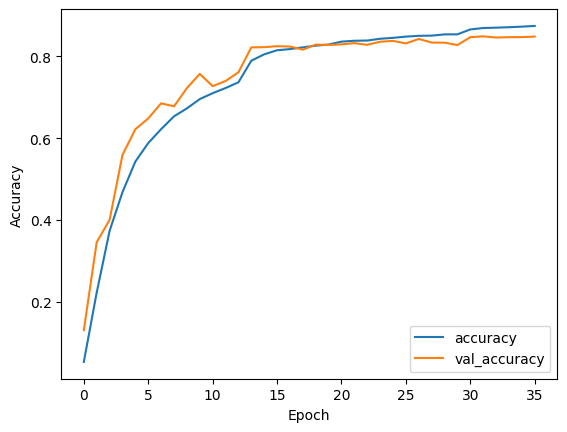

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.8, 1])
plt.legend(loc='lower right')

In [8]:
model.evaluate(test_images, return_dict=True)

164/164 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9188 - loss: 0.3186


{'accuracy': 0.9052430987358093, 'loss': 0.3782142102718353}

In [9]:
from sklearn.metrics import f1_score
import numpy as np
y_pred = model.predict(test_images)
f1_score(np.array(test_images.classes), y_pred.argmax(axis=1), average='weighted')

164/164 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step


0.9043720658336462